In [1]:
import os
from utils import plot_random_images
from utils import preprocess_data
from utils import plot_images_from_array
from utils import extract_data
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear,sigmoid

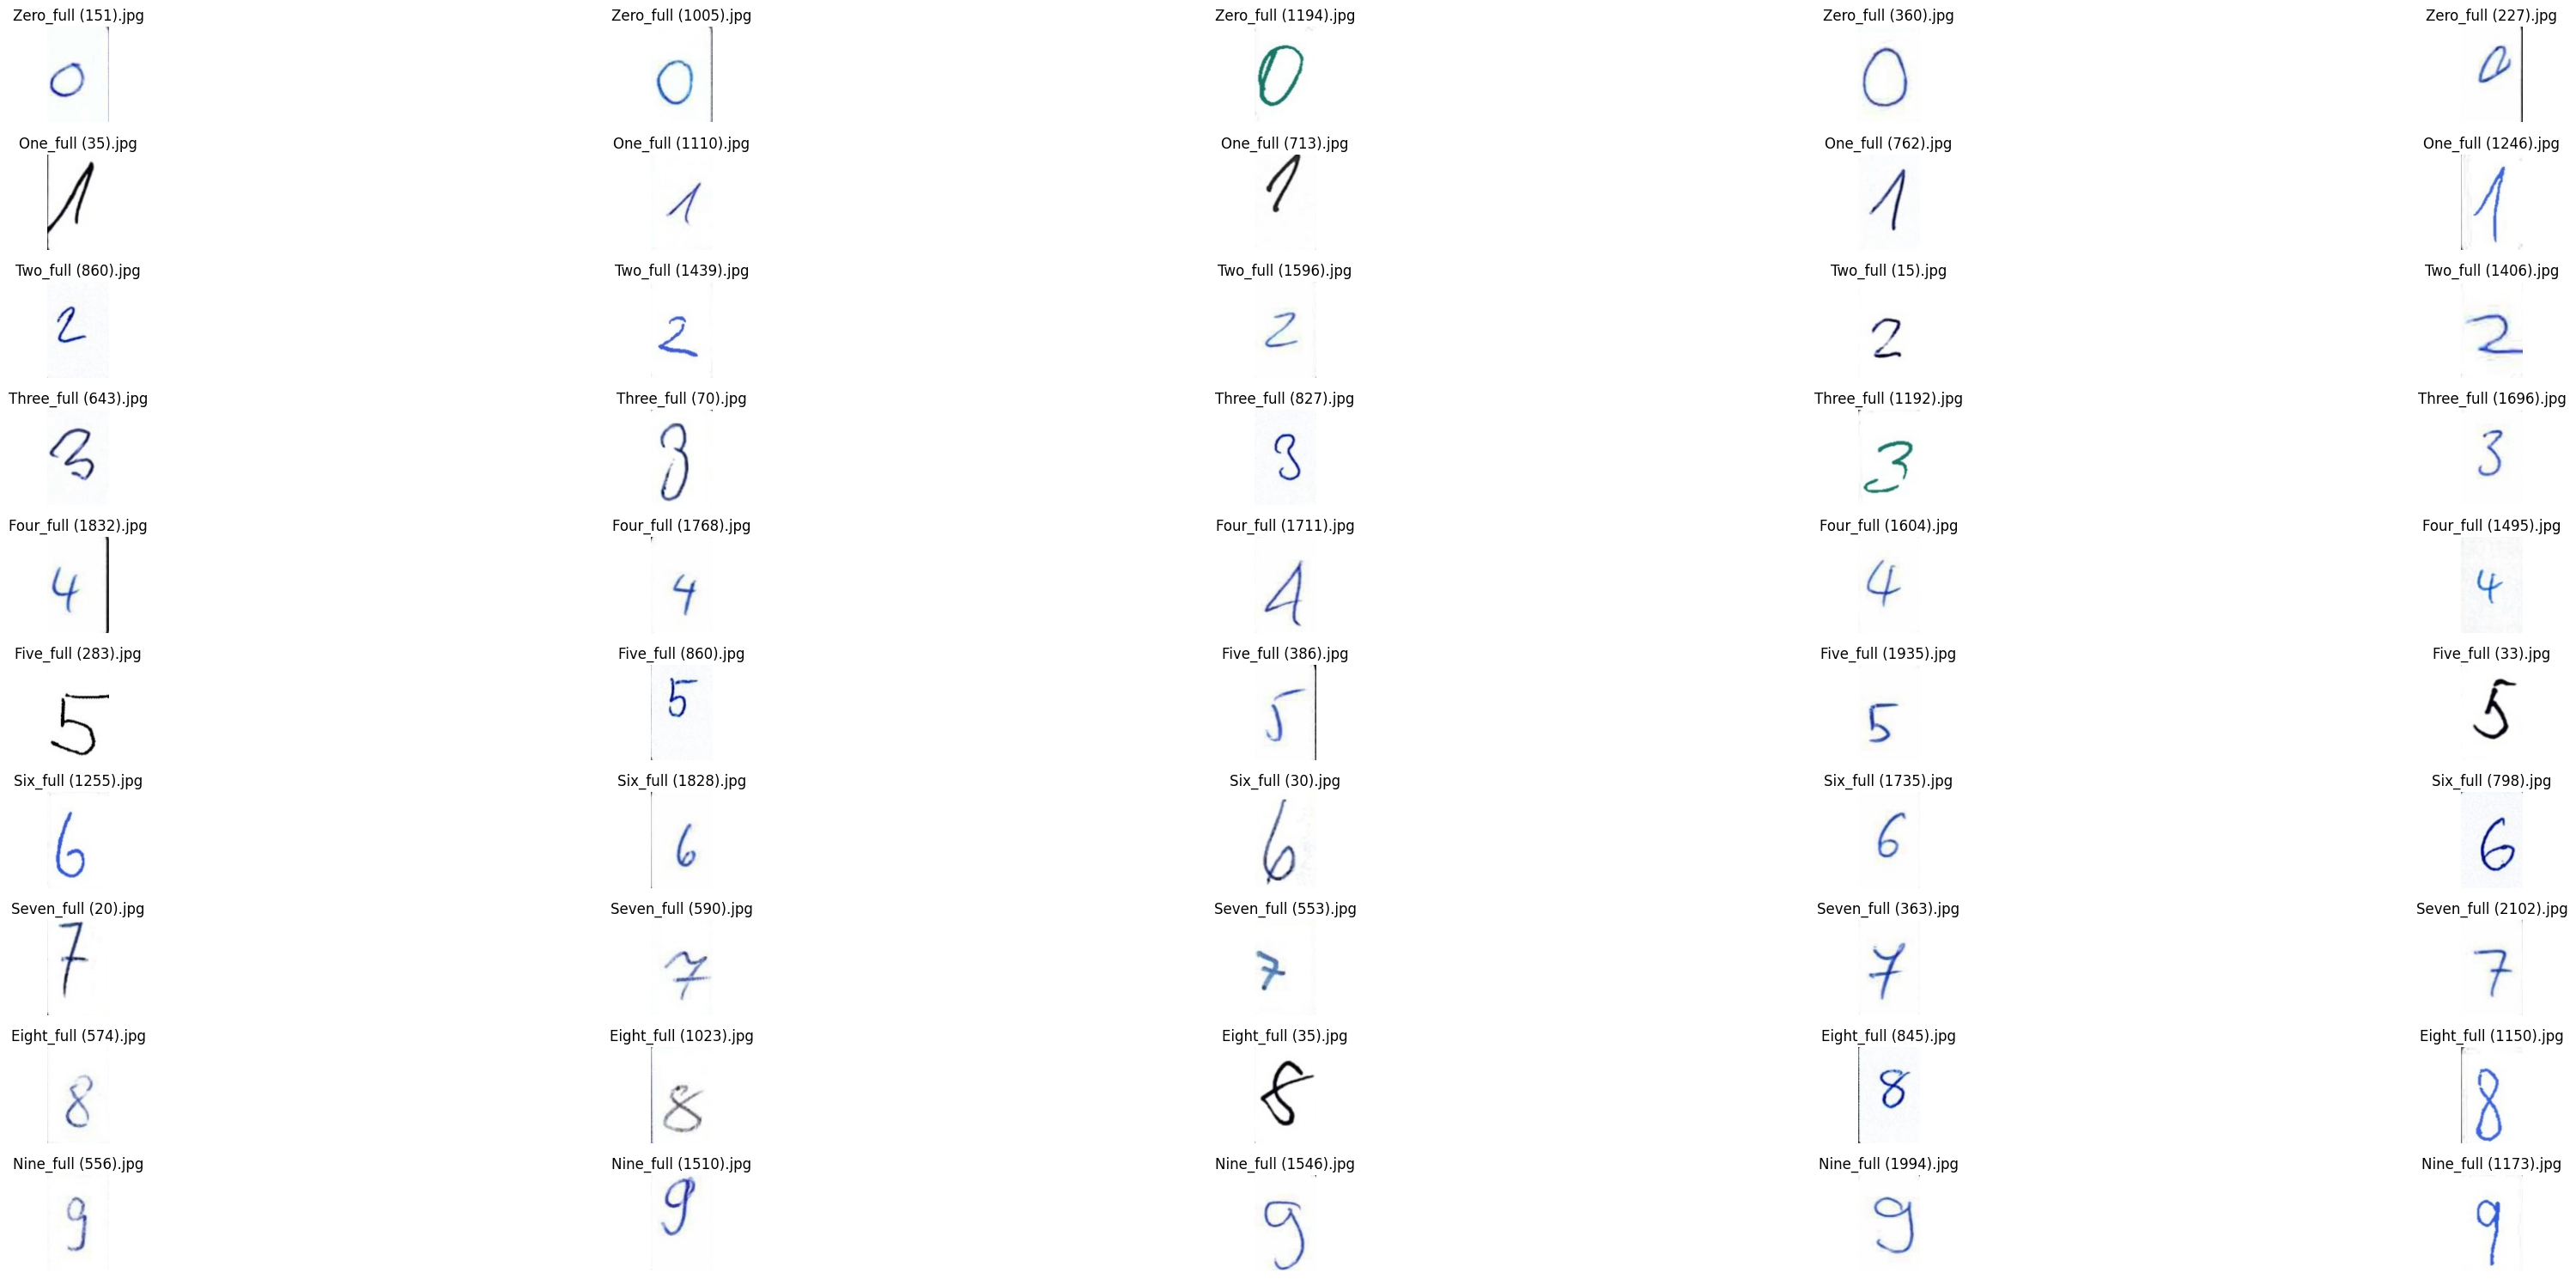

In [2]:
data_dir = os.path.join(os.getcwd(),'dataset')

plot_random_images(data_dir)

In [3]:
crop_size = 1
X,y,image_size = preprocess_data(data_dir, crop_size)

Preprocessing images for digit: 0
Preprocessing images for digit: 1
Preprocessing images for digit: 2
Preprocessing images for digit: 3
Preprocessing images for digit: 4
Preprocessing images for digit: 5
Preprocessing images for digit: 6
Preprocessing images for digit: 7
Preprocessing images for digit: 8
Preprocessing images for digit: 9
Preprocessing done


In [4]:
# checking the dimensions of the loaded data
print(f'shape of X : {X.shape}')
print(f'shape of y : {y.shape}')

#here we have data of 21555 images with each image stored in a 1s array of length 12371

shape of X : (21555, 12371)
shape of y : (21555,)


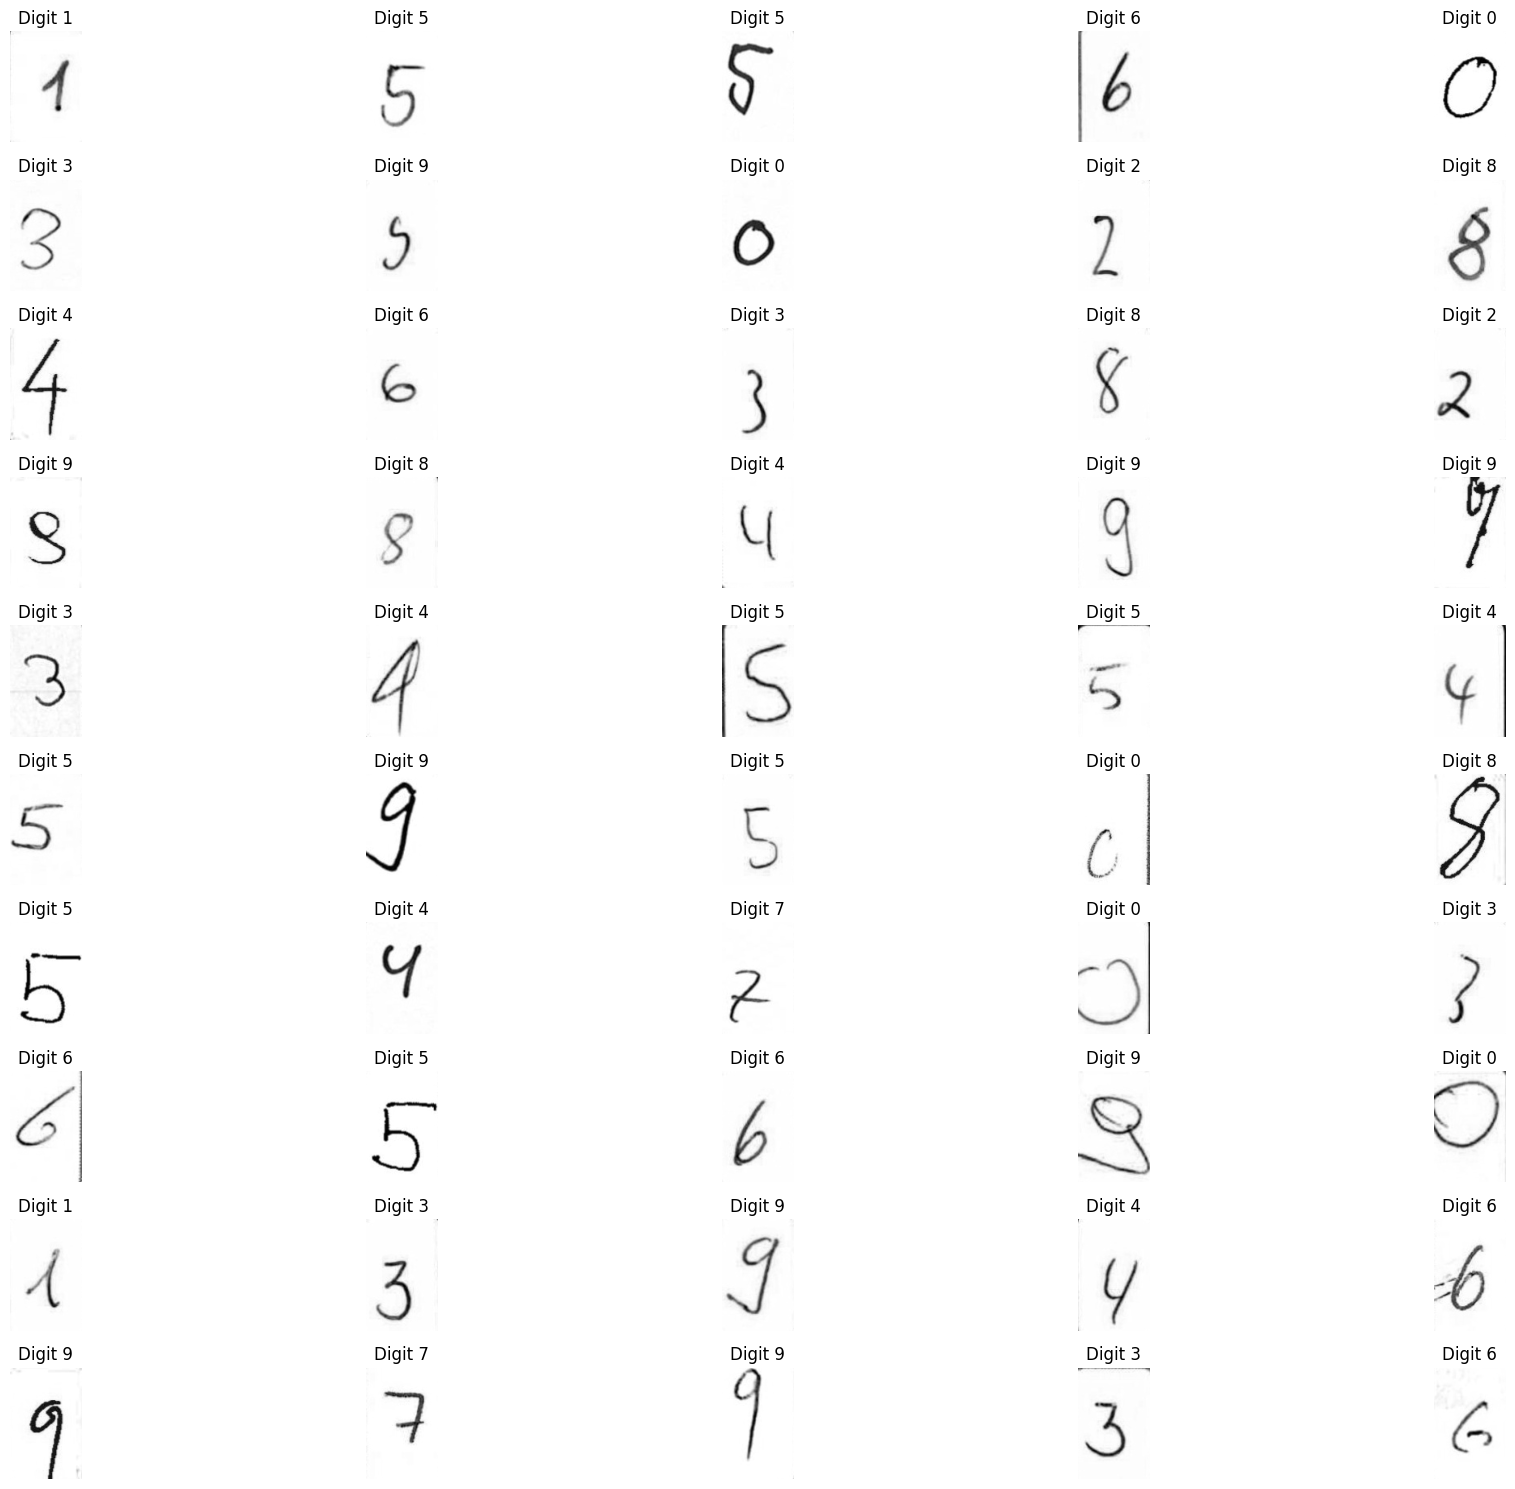

In [5]:
plot_images_from_array(X,y,image_size)

In [6]:
# shuffling the data and slicing it into training and test data

# random seed for reproducibility
np.random.seed(42)

#number of samples
num_samples = X.shape[0]

#create an array of indices and shuffle it
indices = np.arange(num_samples)
np.random.shuffle(indices)

#shufle X and y using the shuffles indices array
X_shuffled = X[indices]
y_shuffled = y[indices]

#ratio for test data
test_percentage = 0.2

#number of test samples
num_test_samples = int(test_percentage * num_samples)

#split the datta into training and test data
X_train, X_test = X_shuffled[num_test_samples:], X_shuffled[:num_test_samples]
y_train, y_test = y_shuffled[num_test_samples:], y_shuffled[:num_test_samples]


In [30]:
tf.random.set_seed(1234)
model = Sequential([
    # Define input layer dimension
    tf.keras.layers.InputLayer(input_shape=(X.shape[1],)), 
    Dense(100, activation='relu', name='layer_1'),
    Dense(50, activation='relu', name='layer_2'),
    Dense(25, activation='relu', name='layer_3'),
    Dense(10, activation='linear', name='layer_4')
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))


In [31]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 100)               1237200   
                                                                 
 layer_2 (Dense)             (None, 50)                5050      
                                                                 
 layer_3 (Dense)             (None, 25)                1275      
                                                                 
 layer_4 (Dense)             (None, 10)                260       
                                                                 
Total params: 1,243,785
Trainable params: 1,243,785
Non-trainable params: 0
_________________________________________________________________


In [32]:
#examine layers
[layer_1, layer_2, layer_3] = model.layers
W1,b1 = layer_1.get_weights()
W2,b2 = layer_2.get_weights()
W3,b3 = layer_3.get_weights()

print(f'W1 shape = {W1.shape}, b1 shape = {b1.shape}')
print(f'W2 shape = {W2.shape}, b2 shape = {b2.shape}')
print(f'W3 shape = {W3.shape}, b3 shape = {b3.shape}')

ValueError: too many values to unpack (expected 3)

In [33]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
)

history = model.fit(X,y,epochs=10)

Epoch 1/10
674/674 [==============================] - 9s 13ms/step - loss: 132.4089
Epoch 2/10
674/674 [==============================] - 9s 13ms/step - loss: 11.9293
Epoch 3/10
674/674 [==============================] - 9s 13ms/step - loss: 3.9143
Epoch 4/10
674/674 [==============================] - 9s 13ms/step - loss: 4.6559
Epoch 5/10
674/674 [==============================] - 9s 14ms/step - loss: 2.3027
Epoch 6/10
674/674 [==============================] - 9s 14ms/step - loss: 2.3024
Epoch 7/10
674/674 [==============================] - 9s 14ms/step - loss: 2.3023
Epoch 8/10
674/674 [==============================] - 10s 14ms/step - loss: 2.3022
Epoch 9/10
674/674 [==============================] - 9s 14ms/step - loss: 2.3023
Epoch 10/10
674/674 [==============================] - 9s 14ms/step - loss: 2.3022


In [40]:
prediction = model.predict(X[-1].reshape(1,X[-5000].shape[0]))

1/1 [==============================] - 0s 17ms/step


In [41]:
np.argmax(prediction)

0

In [42]:
y[-5000]

7